In [4]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import numpy as np
from datetime import timedelta
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf 
from keras.callbacks import TensorBoard
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

from tensorflow.keras import backend as K

In [7]:
bo = pd.read_csv('./../models/preprocess_morganstanley.csv')

In [8]:
bo

,Unnamed: 0,Date,score,Close
0,0,2019-11-13,-0.2500,48.389999
1,1,2019-11-14,0.6901,48.610001
2,2,2019-11-15,0.9524,48.990002
3,3,2019-11-18,0.9081,49.029999
4,4,2019-11-19,0.8338,49.330002
...,...,...,...,...
500,500,2021-11-08,0.5000,100.070000
501,501,2021-11-09,0.5859,99.709999
502,502,2021-11-10,0.6908,97.769997
503,503,2021-11-11,-0.6428,98.879997


In [9]:
train_data, test_data  = bo[0:int(len(bo)*0.8)], bo[int(len(bo)*0.8):]

X_train, X_cv = train_data[0:int(len(train_data)*0.8)], train_data[int(len(train_data)*0.8):]
print(len(X_train), len(X_cv), len(test_data))

323 81 101


In [10]:
def create_dataset(dataset, scoreset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		b = scoreset[i+look_back-1]
		dataX.append(np.append(a,b))
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [11]:

# Feature Scaling
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(X_train['Close'].values.reshape(-1, 1))
cv_set_scaled = sc.transform(X_cv['Close'].values.reshape(-1, 1))
test_set_scaled = sc.transform(test_data['Close'].values.reshape(-1, 1))

sc1 = MinMaxScaler()
training_score_scaled = sc1.fit_transform(X_train['score'].values.reshape(-1, 1))
cv_score_scaled = sc1.transform(X_cv['score'].values.reshape(-1, 1))
test_score_scaled = sc1.transform(test_data['score'].values.reshape(-1, 1))

#Creating Dataset with window size = 60 + News Sentiment of Last Day
trainX, trainY = create_dataset(training_set_scaled, training_score_scaled, 10)
cvX, cvY = create_dataset(cv_set_scaled, cv_score_scaled, 10)
testX, testY = create_dataset(test_set_scaled, test_score_scaled, 10)


In [12]:
trainX.shape, cvX.shape, testX.shape

((312, 11), (70, 11), (90, 11))

In [13]:
trainX, trainY = np.array(trainX), np.array(trainY)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))

cvX, cvY = np.array(cvX), np.array(cvY)
cvX = np.reshape(cvX, (cvX.shape[0], cvX.shape[1], 1))

testX, testY = np.array(testX), np.array(testY)
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [14]:
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [16]:
model = keras.models.load_model('./../models/model_morganStanley.h5')

predicted_stock_price = model.predict(testX)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [17]:
predicted_stock_price

array([[ 93.339745],
       [ 94.00347 ],
       [ 93.73798 ],
       [ 93.773476],
       [ 94.45059 ],
       [ 94.20959 ],
       [ 93.47648 ],
       [ 95.54777 ],
       [ 94.87236 ],
       [ 95.059364],
       [ 95.80776 ],
       [ 96.3598  ],
       [ 95.605415],
       [ 97.40895 ],
       [ 97.16033 ],
       [ 99.39855 ],
       [ 99.93528 ],
       [ 98.93098 ],
       [ 99.90809 ],
       [ 99.957855],
       [100.2846  ],
       [100.94155 ],
       [101.19649 ],
       [101.34531 ],
       [103.05182 ],
       [104.077736],
       [105.83493 ],
       [106.74511 ],
       [107.94636 ],
       [108.56868 ],
       [108.406654],
       [107.157974],
       [106.93217 ],
       [106.744225],
       [106.056885],
       [107.27035 ],
       [107.175354],
       [108.07722 ],
       [108.03251 ],
       [109.253845],
       [109.71293 ],
       [109.892555],
       [110.07707 ],
       [110.166954],
       [109.725655],
       [109.016136],
       [108.27094 ],
       [109.2

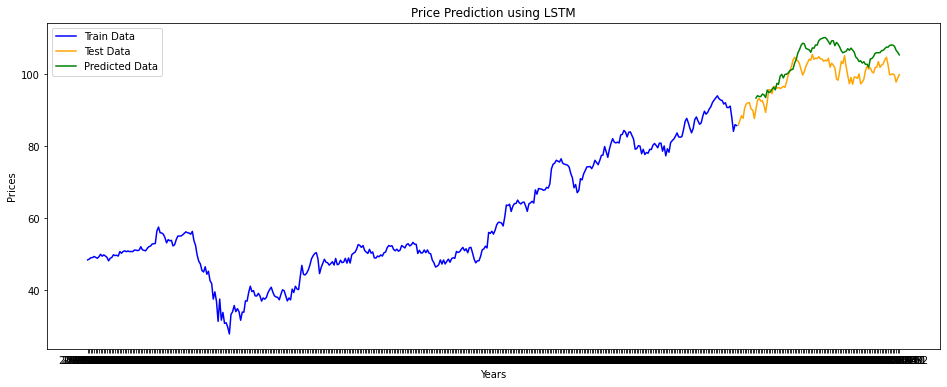

RMSE_LSTM = 4.9297096054292835


In [22]:
plt.figure(figsize=(16, 6))
plt.plot(train_data['Date'], train_data['Close'], color = 'blue', label = 'Train Data')
plt.plot(test_data['Date'], test_data['Close'].values, color = 'orange', label = 'Test Data')
plt.plot(test_data.iloc[11:]['Date'], predicted_stock_price, color = 'green', label = 'Predicted Data')
plt.title('Price Prediction using LSTM')
plt.xlabel('Years')
plt.ylabel('Prices')
plt.legend()
plt.show()
from math import sqrt

RMSE_LSTM = sqrt(mean_squared_error(test_data.iloc[11:]['Close'].values, predicted_stock_price))

print(f"RMSE_LSTM = {RMSE_LSTM}")

In [94]:
df = pd.DataFrame(bo['Date'][len(bo)-90:len(bo),])  ## pred dates
curr_date = df['Date'][415] # current future date



In [95]:
last_price = bo['Close'][414]  # last closing price before today
last_price

87.639999

In [96]:
pred_price = predicted_stock_price[0][0]# pred stock price

In [97]:
percent_movement = (predicted_stock_price[0][0]-last_price)/last_price*100 #stock movement

In [137]:
start_price = bo['Close'][0]
end_price = bo['Close'][504]

net_change = end_price-start_price
net_change

total_movement = net_change/start_price*100
total_movement

106.34428614061346

In [146]:
sd = bo['Close'][404:415].std()
sd

mean = bo['Close'][404:415].mean()
mean



89.391818

In [165]:
sma10 = bo['Close'].rolling(window = 10).mean()
sma10 = sma10.mean()

n=1

decision =""

if (pred_price<=(mean-n*sd)):
    decision = "Buy"
elif (pred_price>=(mean+n*sd)):
    decision="Sell"
else:
    decision="Hold"
    
decision

'Sell'

In [168]:
pred_price

93.339745

In [169]:

df = [[curr_date,pred_price,percent_movement,net_change,total_movement,decision]]

# df_dict ={
#     'Date':curr_date,
#     'Prev_Price':last_price,
#     'Percent_Movement':percent_movement
# }



df_main = pd.DataFrame(df,columns=['Date','Pred_Price','Percent_Movement','net_change','total_movement','Recommendation'])

In [170]:
df

[['2021-07-09',
  93.339745,
  6.503589266210614,
  51.459998999999996,
  106.34428614061346,
  'Sell']]

In [171]:
df_main

,Date,Pred_Price,Percent_Movement,net_change,total_movement,Recommendation
0,2021-07-09,93.339745,6.503589,51.459999,106.344286,Sell
